In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load the data:

In [49]:
#For normalizing Data
def normalize(x_in, x_out):
    '''
    Given training datapoints x_in texting points x_out, 
    it returns normalized x_in and x_out
    Inputs:
        x_in: A (N, D) shaped training data.
        x_out: A (N, D) shaped testing data.

    Outputs:
        x_in, x_out: normalized data based on x_in
    '''
    x_in_norm = np.copy(x_in)
    x_out_norm = np.copy(x_out)
    n, d = x_in.shape
    std_dev = [0]*d 
    mean = [0]*d
    for j in range(d):
        mean[j] = np.mean(x_in[:, j])
        std_dev[j]= np.std(x_in[:, j])
    for i, x_i in enumerate(x_in):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_in_norm[i,j] = (x - mean[j])/std_dev[j]
    for i, x_i in enumerate(x_out):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_out_norm[i,j] = (x - mean[j])/std_dev[j]
    return x_in_norm, x_out_norm

In [3]:
#Normalizing
data = np.loadtxt('train_2008.csv', skiprows=1, delimiter=',')
X = data[:, 3:-1]
y = data[:, -1]

#Checking for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = normalize(X_train, X_test)

NameError: name 'normalize' is not defined

## Training for Logistic Regression:

In [114]:
n = 9
errors = [0]*n
log = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500, multi_class='multinomial')
c_list = [0.0001*10**(x)  for x in range(n)]
for i, c_i in enumerate(c_list):
    log.set_params(C = c_i)
    log.fit(X_train, y_train)
    errors[i] = log.score(X_test, y_test)

/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to conve

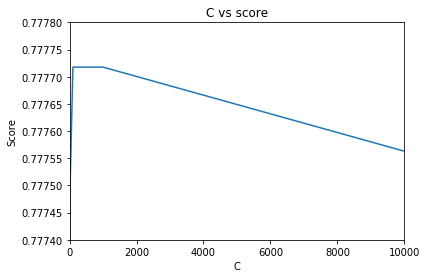

In [127]:
plt.figure()
plt.plot(c_list, errors)
plt.xlim(0.0001, 0.0001*10**(n-1))
plt.ylim(0.7774, 0.7778)
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C vs score')
plt.show()

## Logistic regression submission

In [85]:
X = data[:, 3:-1]
y = data[:, -1]

X_out = np.loadtxt('test_2008.csv', skiprows=1, delimiter=',')
ids = X_out[:,0]
X_out = X_out[:, 3:]

X_train, X_test = normalize(X, X_out)
log = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train, y)
predictions = log.predict_proba(X_test)

In [97]:
prediction = np.vstack((ids,predictions[:,1])).T
np.savetxt('prediction.csv', prediction, fmt="%4f", delimiter=",")

In [5]:
X = data[:, 3:-1]
y = data[:, -1]

X_out = np.loadtxt('test_2008.csv', skiprows=1, delimiter=',')
ids = X_out[:,0]
X_out = X_out[:, 3:]

log = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X, y)
predictions = log.predict_proba(X_out)

prediction = np.vstack((ids,predictions[:,1])).T
np.savetxt('prediction.csv', prediction, fmt="%4f", delimiter=",")

/Users/yoojinchung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
